In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("zillow.csv")
df

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,4.0,4.0,2954.0,735227.0,1924.0,9057.14,6037.0
1,1,4.0,2.0,1390.0,429900.0,1962.0,4892.26,6059.0
2,2,2.0,1.0,823.0,148542.0,1986.0,2666.78,6037.0
3,3,4.0,3.0,2966.0,654241.0,2001.0,8008.59,6037.0
4,4,2.0,2.0,1540.0,456340.0,1938.0,5651.44,6037.0
...,...,...,...,...,...,...,...,...
52436,52436,4.0,2.5,2504.0,809000.0,1968.0,8967.94,6059.0
52437,52437,4.0,2.0,1881.0,449245.0,1974.0,5743.88,6037.0
52438,52438,3.0,3.0,2352.0,870753.0,1907.0,10503.67,6037.0
52439,52439,2.0,1.0,1468.0,268292.0,1932.0,3284.39,6037.0


In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52441 non-null  int64  
 1   bedroomcnt                    52441 non-null  float64
 2   bathroomcnt                   52441 non-null  float64
 3   calculatedfinishedsquarefeet  52359 non-null  float64
 4   taxvaluedollarcnt             52440 non-null  float64
 5   yearbuilt                     52325 non-null  float64
 6   taxamount                     52437 non-null  float64
 7   fips                          52441 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.2 MB


In [4]:
df.head()


,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,4.0,4.0,2954.0,735227.0,1924.0,9057.14,6037.0
1,1,4.0,2.0,1390.0,429900.0,1962.0,4892.26,6059.0
2,2,2.0,1.0,823.0,148542.0,1986.0,2666.78,6037.0
3,3,4.0,3.0,2966.0,654241.0,2001.0,8008.59,6037.0
4,4,2.0,2.0,1540.0,456340.0,1938.0,5651.44,6037.0


In [5]:
df['fips'] = df['fips'].astype(str).apply(lambda x: x.replace('.0',''))


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52441.0,26220.000000,15138.557070,0.00,13110.00,26220.00,39330.00,52440.0
bedroomcnt,52441.0,3.300681,0.949094,0.00,3.00,3.00,4.00,14.0
bathroomcnt,52441.0,2.299403,1.022772,0.00,2.00,2.00,3.00,18.0
calculatedfinishedsquarefeet,52359.0,1922.890754,1004.365838,128.00,1268.00,1659.00,2306.00,21929.0
taxvaluedollarcnt,52440.0,529688.163921,751894.553363,1000.00,193747.50,373612.00,619301.25,49061236.0
yearbuilt,52325.0,1963.393884,23.133571,1878.00,1950.00,1961.00,1979.00,2016.0
taxamount,52437.0,6453.511209,8755.568452,49.18,2656.22,4647.74,7377.50,586639.3


In [7]:
df.isnull().sum()/len(df) * 100


Unnamed: 0                      0.000000
bedroomcnt                      0.000000
bathroomcnt                     0.000000
calculatedfinishedsquarefeet    0.156366
taxvaluedollarcnt               0.001907
yearbuilt                       0.221201
taxamount                       0.007628
fips                            0.000000
dtype: float64

In [8]:
# dropping nulls  
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52315 entries, 0 to 52440
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52315 non-null  int64  
 1   bedroomcnt                    52315 non-null  float64
 2   bathroomcnt                   52315 non-null  float64
 3   calculatedfinishedsquarefeet  52315 non-null  float64
 4   taxvaluedollarcnt             52315 non-null  float64
 5   yearbuilt                     52315 non-null  float64
 6   taxamount                     52315 non-null  float64
 7   fips                          52315 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 3.6+ MB


In [9]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print("-----------------")
    

Unnamed: 0
0        1
34966    1
34956    1
34957    1
34958    1
        ..
17482    1
17483    1
17484    1
17485    1
52440    1
Name: Unnamed: 0, Length: 52315, dtype: int64
-----------------
bedroomcnt
3.0     23346
4.0     15226
2.0      8333
5.0      3970
6.0       633
1.0       605
7.0       106
0.0        57
8.0        24
9.0         8
12.0        3
10.0        2
14.0        1
11.0        1
Name: bedroomcnt, dtype: int64
-----------------
bathroomcnt
2.0     21887
3.0     10664
1.0      9552
2.5      3931
4.0      2227
3.5       913
1.5       840
5.0       803
4.5       682
6.0       322
5.5       224
7.0        88
8.0        53
6.5        47
0.0        41
7.5        16
9.0        13
10.0        5
11.0        3
8.5         2
18.0        1
13.0        1
Name: bathroomcnt, dtype: int64
-----------------
calculatedfinishedsquarefeet
1120.0    128
1200.0    119
1080.0    102
936.0      86
1040.0     86
         ... 
3905.0      1
7311.0      1
4917.0      1
4828.0      1
588.0    

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52315.0,26220.819574,15140.096406,0.00,13113.500,26218.00,39335.50,52440.0
bedroomcnt,52315.0,3.305897,0.940601,0.00,3.000,3.00,4.00,14.0
bathroomcnt,52315.0,2.302791,1.019080,0.00,2.000,2.00,3.00,18.0
calculatedfinishedsquarefeet,52315.0,1922.553914,1003.629061,128.00,1268.000,1658.00,2305.00,21929.0
taxvaluedollarcnt,52315.0,528044.818809,748457.587363,1000.00,193701.000,373374.00,618617.00,49061236.0
yearbuilt,52315.0,1963.395699,23.133908,1878.00,1950.000,1961.00,1979.00,2016.0
taxamount,52315.0,6434.748320,8709.643614,49.18,2656.185,4645.42,7371.64,586639.3


Unnamed: 0


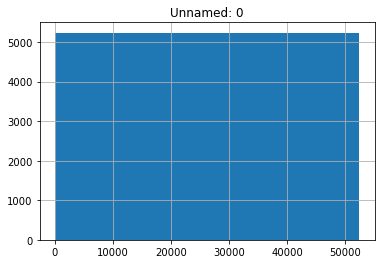

bedroomcnt


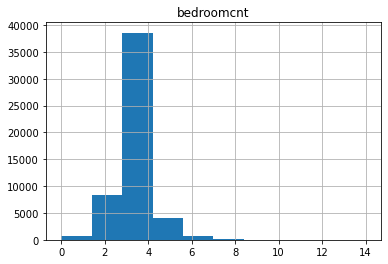

bathroomcnt


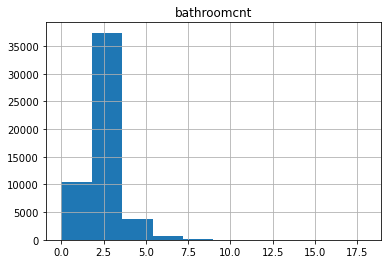

calculatedfinishedsquarefeet


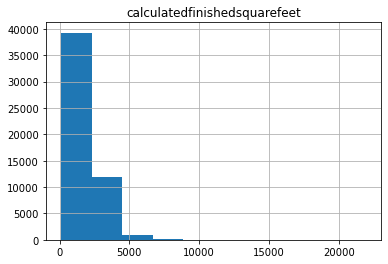

taxvaluedollarcnt


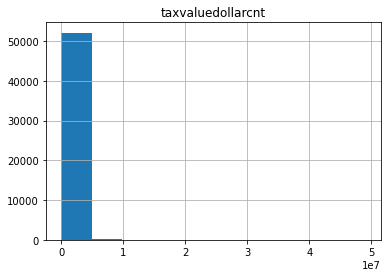

yearbuilt


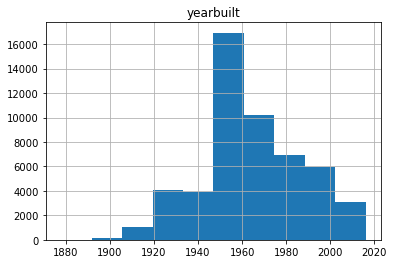

taxamount


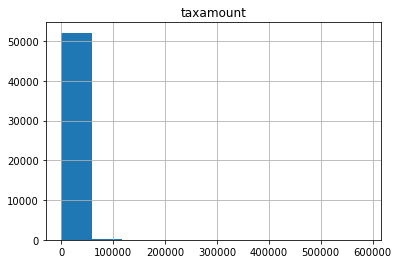

fips


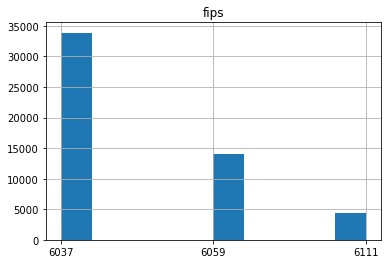

In [11]:
for col in df.columns:
    print(col)
    plt.title(col)
    df[col].hist()
    plt.show()

In [12]:
# reasonably sizing up the houses
df[df.calculatedfinishedsquarefeet <= 25_000].taxvaluedollarcnt.mean()


528044.818809137

In [13]:
df[df.calculatedfinishedsquarefeet <= 25_000].shape[0]/df.shape[0]

1.0

In [14]:
df = df[df.calculatedfinishedsquarefeet <= 25_000]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52315.0,26220.819574,15140.096406,0.00,13113.500,26218.00,39335.50,52440.0
bedroomcnt,52315.0,3.305897,0.940601,0.00,3.000,3.00,4.00,14.0
bathroomcnt,52315.0,2.302791,1.019080,0.00,2.000,2.00,3.00,18.0
calculatedfinishedsquarefeet,52315.0,1922.553914,1003.629061,128.00,1268.000,1658.00,2305.00,21929.0
taxvaluedollarcnt,52315.0,528044.818809,748457.587363,1000.00,193701.000,373374.00,618617.00,49061236.0
yearbuilt,52315.0,1963.395699,23.133908,1878.00,1950.000,1961.00,1979.00,2016.0
taxamount,52315.0,6434.748320,8709.643614,49.18,2656.185,4645.42,7371.64,586639.3


In [15]:
# having a better view of the bathrooms
df.bathroomcnt.sort_values(ascending=False).head(100)


5176     18.0
14485    13.0
6052     11.0
48003    11.0
26152    11.0
         ... 
38305     7.0
30511     7.0
28323     7.0
240       7.0
51586     7.0
Name: bathroomcnt, Length: 100, dtype: float64

In [16]:
# percentage of properties with less than 6 bathrooms
df[df.bathroomcnt<6].shape[0]/df.shape[0]

0.9894676479021314

In [17]:
# dropping 6 bathrooms and higher 
# dropping 6 bedrooms and higher
df = df[df.bathroomcnt <= 6]
df = df[df.bedroomcnt <= 6]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,51987.0,26222.308904,15134.927247,0.00,13123.50,26215.00,39329.50,52440.00
bedroomcnt,51987.0,3.286995,0.905979,0.00,3.00,3.00,4.00,6.00
bathroomcnt,51987.0,2.276281,0.954040,0.00,2.00,2.00,3.00,6.00
calculatedfinishedsquarefeet,51987.0,1893.942389,910.663774,128.00,1265.00,1652.00,2290.00,12616.00
taxvaluedollarcnt,51987.0,508462.956816,601468.477310,1000.00,192601.00,371363.00,612382.00,20203475.00
yearbuilt,51987.0,1963.314867,23.054712,1878.00,1950.00,1960.00,1979.00,2016.00
taxamount,51987.0,6205.363168,6922.878408,49.18,2644.86,4623.72,7310.58,229735.52


In [18]:
df[df.calculatedfinishedsquarefeet>70].shape[0]

51987

In [19]:
# DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')


In [20]:
# percentage of houses under 6 bedrooms
df[df.bedroomcnt>6].shape[0]/df.shape[0]

0.0

In [21]:
# % of houses less than 1,800,000 in tax value
df[df.taxvaluedollarcnt<=1_800_000].shape[0]/df.shape[0]

0.9704156808432878

In [22]:
df = df[df.taxvaluedollarcnt<=1_800_000]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50449.0,26225.508573,15134.245453,0.00,13134.00,26222.00,39342.00,52440.00
bedroomcnt,50449.0,3.265099,0.893808,0.00,3.00,3.00,4.00,6.00
bathroomcnt,50449.0,2.221828,0.887755,0.00,2.00,2.00,3.00,6.00
calculatedfinishedsquarefeet,50449.0,1832.789510,810.166271,128.00,1256.00,1631.00,2224.00,8615.00
taxvaluedollarcnt,50449.0,434282.132906,334485.063811,1000.00,187028.00,360766.00,582495.00,1800000.00
yearbuilt,50449.0,1962.984043,22.781555,1878.00,1950.00,1960.00,1978.00,2016.00
taxamount,50449.0,5359.802703,3913.816111,49.18,2587.04,4506.12,6970.24,58634.77


In [23]:
# dropping data lower than 70 sqfeet due to industry analysis
df = df[df.calculatedfinishedsquarefeet>70]

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50449.0,26225.508573,15134.245453,0.00,13134.00,26222.00,39342.00,52440.00
bedroomcnt,50449.0,3.265099,0.893808,0.00,3.00,3.00,4.00,6.00
bathroomcnt,50449.0,2.221828,0.887755,0.00,2.00,2.00,3.00,6.00
calculatedfinishedsquarefeet,50449.0,1832.789510,810.166271,128.00,1256.00,1631.00,2224.00,8615.00
taxvaluedollarcnt,50449.0,434282.132906,334485.063811,1000.00,187028.00,360766.00,582495.00,1800000.00
yearbuilt,50449.0,1962.984043,22.781555,1878.00,1950.00,1960.00,1978.00,2016.00
taxamount,50449.0,5359.802703,3913.816111,49.18,2587.04,4506.12,6970.24,58634.77


In [25]:
# convert fips to catgorical

In [26]:
df["fips"] = pd.Categorical(df.fips)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50449 entries, 0 to 52440
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Unnamed: 0                    50449 non-null  int64   
 1   bedroomcnt                    50449 non-null  float64 
 2   bathroomcnt                   50449 non-null  float64 
 3   calculatedfinishedsquarefeet  50449 non-null  float64 
 4   taxvaluedollarcnt             50449 non-null  float64 
 5   yearbuilt                     50449 non-null  float64 
 6   taxamount                     50449 non-null  float64 
 7   fips                          50449 non-null  category
dtypes: category(1), float64(6), int64(1)
memory usage: 3.1 MB


In [28]:
# get dummies on fips
dummy_df = pd.get_dummies(df[["fips"]], dummy_na =False, drop_first = [True,True])
df = pd.concat([df, dummy_df], axis = 1)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50449 entries, 0 to 52440
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Unnamed: 0                    50449 non-null  int64   
 1   bedroomcnt                    50449 non-null  float64 
 2   bathroomcnt                   50449 non-null  float64 
 3   calculatedfinishedsquarefeet  50449 non-null  float64 
 4   taxvaluedollarcnt             50449 non-null  float64 
 5   yearbuilt                     50449 non-null  float64 
 6   taxamount                     50449 non-null  float64 
 7   fips                          50449 non-null  category
 8   fips_6059                     50449 non-null  uint8   
 9   fips_6111                     50449 non-null  uint8   
dtypes: category(1), float64(6), int64(1), uint8(2)
memory usage: 3.2 MB


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [32]:
# splitting my data
'''
This function performs split on zillow data, stratify taxvaluedollarcnt.
Returns train, validate, and test dfs.
'''
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123) 
#                                         stratify=)
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123) 
#                                    stratify=train_validate)

In [33]:
train.shape, validate.shape, test.shape

((28251, 10), (12108, 10), (10090, 10))

In [ ]:
train.head()